# Optimización de Hiperparámetros con Optuna

Este cuaderno utiliza Optuna para optimizar modelos de clasificación: XGBoost, LightGBM y una red neuronal básica con sklearn, usando el dataset de churn en telecomunicaciones.

In [12]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')


In [13]:
# Dataset de churn en telecomunicaciones (puedes reemplazar la ruta si tienes el archivo local)
#url = 'https://raw.githubusercontent.com/blastchar/telco-churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv('../DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Eliminar columnas no necesarias
df.drop(['customerID'], axis=1, inplace=True)

# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Variables
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Optimización de XGBoost con Optuna

In [14]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
study_xgb.best_params

[I 2025-10-13 18:24:18,640] A new study created in memory with name: no-name-ecfa9dbd-9d53-466d-9d33-976b8f82e411
[I 2025-10-13 18:24:20,163] Trial 0 finished with value: 0.8021333333333333 and parameters: {'n_estimators': 394, 'max_depth': 7, 'learning_rate': 0.019873025940715182, 'subsample': 0.992407665395284, 'colsample_bytree': 0.594014519239101}. Best is trial 0 with value: 0.8021333333333333.
[I 2025-10-13 18:24:21,906] Trial 1 finished with value: 0.7703111111111111 and parameters: {'n_estimators': 330, 'max_depth': 9, 'learning_rate': 0.24762611016473765, 'subsample': 0.5838310342025032, 'colsample_bytree': 0.8398303446515406}. Best is trial 0 with value: 0.8021333333333333.
[I 2025-10-13 18:24:22,493] Trial 2 finished with value: 0.7822222222222223 and parameters: {'n_estimators': 108, 'max_depth': 7, 'learning_rate': 0.2858849697944818, 'subsample': 0.6002247554550952, 'colsample_bytree': 0.5754774789348189}. Best is trial 0 with value: 0.8021333333333333.
[I 2025-10-13 18:2

{'n_estimators': 175,
 'max_depth': 3,
 'learning_rate': 0.03163619603086806,
 'subsample': 0.7147838566668543,
 'colsample_bytree': 0.6724077522040756}

## Optimización de LightGBM con Optuna

In [15]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
study_lgb.best_params

[I 2025-10-13 18:24:54,654] A new study created in memory with name: no-name-22fcf66a-b837-402b-8c60-c1c5372083d8


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-10-13 18:24:55,198] Trial 0 finished with value: 0.7772444444444444 and parameters: {'n_estimators': 267, 'max_depth': 5, 'learning_rate': 0.2717284886719639, 'subsample': 0.7377021033830746, 'colsample_bytree': 0.8302148230309792}. Best is trial 0 with value: 0.7772444444444444.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:55,570] Trial 1 finished with value: 0.791111111111111 and parameters: {'n_estimators': 220, 'max_depth': 4, 'learning_rate': 0.19713259254011586, 'subsample': 0.8131839607359637, 'colsample_bytree': 0.766770242921208}. Best is trial 1 with value: 0.791111111111111.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:55,893] Trial 2 finished with value: 0.8048000000000001 and parameters: {'n_estimators': 134, 'max_depth': 5, 'learning_rate': 0.07309673377536366, 'subsample': 0.8864148339146771, 'colsample_bytree': 0.50814236373338}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:56,428] Trial 3 finished with value: 0.789511111111111 and parameters: {'n_estimators': 306, 'max_depth': 5, 'learning_rate': 0.11943448897371992, 'subsample': 0.9891658970626453, 'colsample_bytree': 0.6662958433230446}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:56,897] Trial 4 finished with value: 0.7806222222222221 and parameters: {'n_estimators': 203, 'max_depth': 8, 'learning_rate': 0.25825346521161585, 'subsample': 0.6439790985642695, 'colsample_bytree': 0.5483947485864262}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:57,154] Trial 5 finished with value: 0.7991111111111112 and parameters: {'n_estimators': 285, 'max_depth': 3, 'learning_rate': 0.14280024634775063, 'subsample': 0.620721746635881, 'colsample_bytree': 0.899312237153776}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:57,706] Trial 6 finished with value: 0.7994666666666667 and parameters: {'n_estimators': 254, 'max_depth': 6, 'learning_rate': 0.04952200393033066, 'subsample': 0.8627619329984897, 'colsample_bytree': 0.7889324888818674}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:58,390] Trial 7 finished with value: 0.7850666666666667 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.18311142368996292, 'subsample': 0.9608495616997872, 'colsample_bytree': 0.9180532980410767}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1

[I 2025-10-13 18:24:58,755] Trial 8 finished with value: 0.7994666666666665 and parameters: {'n_estimators': 217, 'max_depth': 3, 'learning_rate': 0.2041216579703586, 'subsample': 0.924107447859021, 'colsample_bytree': 0.698106442859534}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:59,444] Trial 9 finished with value: 0.7905777777777777 and parameters: {'n_estimators': 372, 'max_depth': 4, 'learning_rate': 0.173581473278221, 'subsample': 0.8808728966421768, 'colsample_bytree': 0.5230368763720636}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:24:59,912] Trial 10 finished with value: 0.7975111111111112 and parameters: {'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.013790725535209068, 'subsample': 0.5208491278285925, 'colsample_bytree': 0.6069088055267763}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-10-13 18:25:00,426] Trial 11 finished with value: 0.8019555555555554 and parameters: {'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.05071005133296311, 'subsample': 0.8256750858855021, 'colsample_bytree': 0.795189763464841}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:00,756] Trial 12 finished with value: 0.7985777777777777 and parameters: {'n_estimators': 114, 'max_depth': 7, 'learning_rate': 0.08860470280647148, 'subsample': 0.772500328924464, 'colsample_bytree': 0.9890836514612839}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2025-10-13 18:25:01,203] Trial 13 finished with value: 0.7987555555555556 and parameters: {'n_estimators': 163, 'max_depth': 7, 'learning_rate': 0.075755574943361, 'subsample': 0.7347359261148974, 'colsample_bytree': 0.7002420679290174}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:01,661] Trial 14 finished with value: 0.8035555555555556 and parameters: {'n_estimators': 154, 'max_depth': 10, 'learning_rate': 0.028568018698805604, 'subsample': 0.8252169178745367, 'colsample_bytree': 0.8347086997912434}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to rem

[I 2025-10-13 18:25:02,110] Trial 15 finished with value: 0.8035555555555556 and parameters: {'n_estimators': 164, 'max_depth': 10, 'learning_rate': 0.029285288181062834, 'subsample': 0.9241810732310215, 'colsample_bytree': 0.875213961855907}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative:

[I 2025-10-13 18:25:02,545] Trial 16 finished with value: 0.7941333333333334 and parameters: {'n_estimators': 166, 'max_depth': 9, 'learning_rate': 0.10943987145631706, 'subsample': 0.704578620068142, 'colsample_bytree': 0.6166220145164053}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-10-13 18:25:02,880] Trial 17 finished with value: 0.8005333333333334 and parameters: {'n_estimators': 142, 'max_depth': 6, 'learning_rate': 0.08006473610346425, 'subsample': 0.8736398407483791, 'colsample_bytree': 0.9747644317946457}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:03,849] Trial 18 finished with value: 0.8046222222222221 and parameters: {'n_estimators': 350, 'max_depth': 9, 'learning_rate': 0.010070708174321388, 'subsample': 0.8049755277061816, 'colsample_bytree': 0.8450209039596179}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[I 2025-10-13 18:25:04,838] Trial 19 finished with value: 0.8046222222222222 and parameters: {'n_estimators': 398, 'max_depth': 8, 'learning_rate': 0.011327873966806401, 'subsample': 0.6776977609371708, 'colsample_bytree': 0.7453054630521703}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:05,430] Trial 20 finished with value: 0.7783111111111111 and parameters: {'n_estimators': 399, 'max_depth': 5, 'learning_rate': 0.23659759539018632, 'subsample': 0.566365487050043, 'colsample_bytree': 0.5714177465760432}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[I 2025-10-13 18:25:06,383] Trial 21 finished with value: 0.8030222222222223 and parameters: {'n_estimators': 342, 'max_depth': 9, 'learning_rate': 0.010566139530975238, 'subsample': 0.6701537955851959, 'colsample_bytree': 0.7218517498505823}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-10-13 18:25:07,198] Trial 22 finished with value: 0.7955555555555556 and parameters: {'n_estimators': 342, 'max_depth': 8, 'learning_rate': 0.051404097588263156, 'subsample': 0.79378373895907, 'colsample_bytree': 0.6490904360876889}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:08,743] Trial 23 finished with value: 0.7898666666666667 and parameters: {'n_estimators': 399, 'max_depth': 9, 'learning_rate': 0.060719708806717176, 'subsample': 0.6933803547621205, 'colsample_bytree': 0.9400824434430671}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:09,772] Trial 24 finished with value: 0.7877333333333333 and parameters: {'n_estimators': 341, 'max_depth': 8, 'learning_rate': 0.10170620965216838, 'subsample': 0.596697333299482, 'colsample_bytree': 0.8498770549405725}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:10,685] Trial 25 finished with value: 0.7843555555555556 and parameters: {'n_estimators': 373, 'max_depth': 9, 'learning_rate': 0.13829246742212806, 'subsample': 0.7628135886046076, 'colsample_bytree': 0.7531748680239013}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choo

[I 2025-10-13 18:25:11,385] Trial 26 finished with value: 0.8037333333333333 and parameters: {'n_estimators': 321, 'max_depth': 6, 'learning_rate': 0.032698372128602646, 'subsample': 0.9198483907556405, 'colsample_bytree': 0.5089577451646214}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:11,840] Trial 27 finished with value: 0.7987555555555556 and parameters: {'n_estimators': 373, 'max_depth': 4, 'learning_rate': 0.06806677366532025, 'subsample': 0.8589037727125387, 'colsample_bytree': 0.8106463235050901}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:12,295] Trial 28 finished with value: 0.8032 and parameters: {'n_estimators': 198, 'max_depth': 7, 'learning_rate': 0.033197286702514914, 'subsample': 0.7134563619523587, 'colsample_bytree': 0.8647327619451735}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-10-13 18:25:12,937] Trial 29 finished with value: 0.8030222222222222 and parameters: {'n_estimators': 308, 'max_depth': 5, 'learning_rate': 0.010720668600075454, 'subsample': 0.7394433890524542, 'colsample_bytree': 0.5934528893036307}. Best is trial 2 with value: 0.8048000000000001.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'n_estimators': 134,
 'max_depth': 5,
 'learning_rate': 0.07309673377536366,
 'subsample': 0.8864148339146771,
 'colsample_bytree': 0.50814236373338}

## Optimización de Red Neuronal (MLPClassifier) con Optuna

In [16]:
def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)

    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                       alpha=alpha,
                                                       learning_rate_init=learning_rate_init,
                                                       max_iter=500, random_state=42))
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=30)
study_nn.best_params

[I 2025-10-13 18:25:19,839] A new study created in memory with name: no-name-4242177f-5811-4f47-9204-15f8b38368bb
[I 2025-10-13 18:25:20,861] Trial 0 finished with value: 0.7859555555555556 and parameters: {'hidden_layer_sizes': (64, 32), 'alpha': 3.884574205171863e-05, 'learning_rate_init': 0.09480682024305634}. Best is trial 0 with value: 0.7859555555555556.
[I 2025-10-13 18:25:22,514] Trial 1 finished with value: 0.7744 and parameters: {'hidden_layer_sizes': (64, 32), 'alpha': 0.00023291856545486282, 'learning_rate_init': 0.07479754710455186}. Best is trial 0 with value: 0.7859555555555556.
[I 2025-10-13 18:25:26,449] Trial 2 finished with value: 0.7578666666666667 and parameters: {'hidden_layer_sizes': (128,), 'alpha': 0.0009958540077831734, 'learning_rate_init': 0.03683394822393536}. Best is trial 0 with value: 0.7859555555555556.
[I 2025-10-13 18:25:28,556] Trial 3 finished with value: 0.7486222222222222 and parameters: {'hidden_layer_sizes': (64,), 'alpha': 2.969041098602346e-05

{'hidden_layer_sizes': (64, 32),
 'alpha': 9.641384616168273e-05,
 'learning_rate_init': 0.08950572291194117}

## Visualización de Importancia de Hiperparámetros

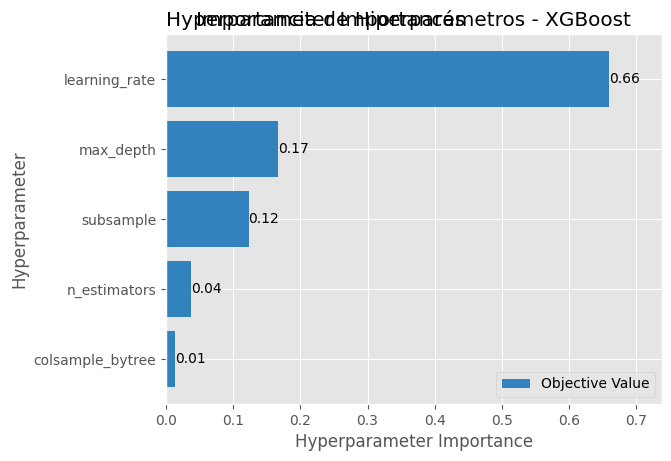

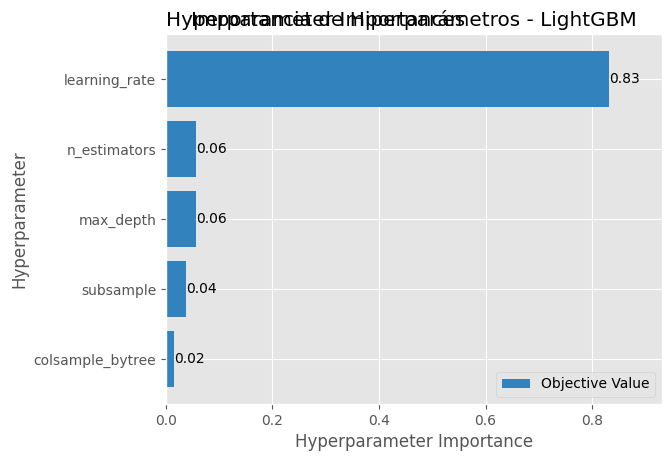

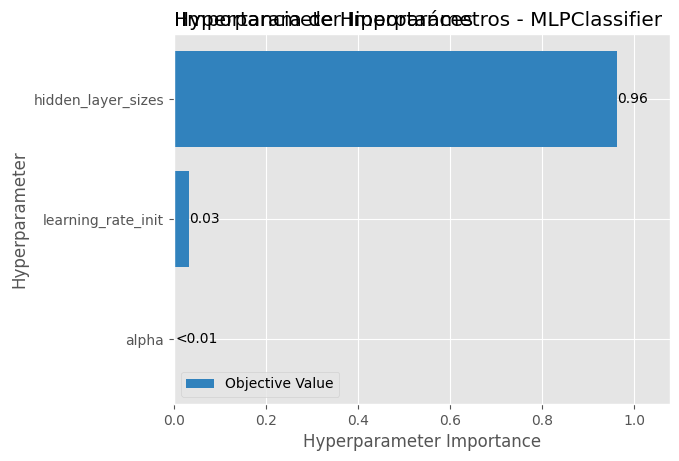

In [17]:
import optuna.visualization.matplotlib as vis
import matplotlib.pyplot as plt

# Visualización para XGBoost
fig_xgb = vis.plot_param_importances(study_xgb)
fig_xgb.set_title("Importancia de Hiperparámetros - XGBoost")
plt.show()

# Visualización para LightGBM
fig_lgb = vis.plot_param_importances(study_lgb)
fig_lgb.set_title("Importancia de Hiperparámetros - LightGBM")
plt.show()

# Visualización para Red Neuronal
fig_nn = vis.plot_param_importances(study_nn)
fig_nn.set_title("Importancia de Hiperparámetros - MLPClassifier")
plt.show()

Perfecto 👍 Vamos a explicarlo paso a paso y en palabras **muy sencillas**, sin necesidad de saber de modelos avanzados.
*(Por cierto, puedes ver más ejemplos de este tipo en [gptonline.ai](https://gptonline.ai/)).*

---

## 🧠 Qué está haciendo este código

Todo el código está usando una **herramienta llamada Optuna**, que sirve para **encontrar automáticamente los mejores parámetros** de un modelo de *machine learning*.

Podríamos compararlo con un “entrenador automático” que prueba distintas configuraciones hasta dar con la combinación que mejor funciona.

Cada bloque del código hace esto con un modelo distinto:

1. **XGBoost**
2. **LightGBM**
3. **Red neuronal (MLPClassifier)**

---

## ⚙️ 1️⃣ Optimización de XGBoost con Optuna

### 🔍 Qué es XGBoost

Es un modelo muy potente para clasificación (por ejemplo, detectar si algo es “positivo” o “negativo”).
Funciona con **árboles de decisión** (como preguntas tipo “¿es mayor que…?”) pero los combina de manera muy eficiente.

---

### 📦 Qué hace el código

```python
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    ...
```

👉 Aquí se define una función llamada `objective_xgb` que le dice a Optuna **qué parámetros probar**.
Por ejemplo:

* `n_estimators`: cuántos árboles usar.
* `max_depth`: cuán profundo puede ser cada árbol.
* `learning_rate`: cuánto “aprende” el modelo en cada paso (valores pequeños → más lento pero más preciso).
* `subsample` y `colsample_bytree`: qué porcentaje de los datos y variables usar (ayuda a evitar sobreajuste).

Cada vez que Optuna ejecuta esta función, prueba una combinación diferente.

---

### ⚙️ Entrenamiento y evaluación

```python
return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
```

Esto entrena el modelo y calcula su **precisión promedio (accuracy)** usando validación cruzada.
Optuna guarda el resultado y busca mejorar en cada intento.

---

### 🏁 Resultado

```
{'n_estimators': 175,
 'max_depth': 3,
 'learning_rate': 0.0316,
 'subsample': 0.7147,
 'colsample_bytree': 0.6724}
```

💡 Esto significa que la mejor combinación encontrada fue:

* 175 árboles,
* cada árbol poco profundo (profundidad 3),
* una tasa de aprendizaje baja (0.03),
* usa alrededor del 70 % de los datos y variables por iteración.

👉 En resumen: **un modelo simple pero equilibrado**, que probablemente evita sobreajustarse.

---

## ⚙️ 2️⃣ Optimización de LightGBM con Optuna

### 🔍 Qué es LightGBM

Otro modelo de árboles parecido a XGBoost, pero **más rápido y ligero**, especialmente con grandes cantidades de datos.

---

### 📦 Qué hace el código

Es casi igual al anterior, solo cambia el modelo:

```python
model = lgb.LGBMClassifier(**params)
```

---

### 🏁 Resultado

```
{'n_estimators': 134,
 'max_depth': 5,
 'learning_rate': 0.0731,
 'subsample': 0.8864,
 'colsample_bytree': 0.5081}
```

💡 Esto indica que:

* Usa 134 árboles, con profundidad media (5),
* Una tasa de aprendizaje algo mayor (0.07),
* Toma el 88 % de los datos y el 50 % de las variables.

👉 En resumen: **modelo rápido y flexible**, probablemente aprende más rápido que XGBoost pero puede ser un poco menos estable.

---

## ⚙️ 3️⃣ Optimización de Red Neuronal (MLPClassifier)

### 🔍 Qué es una red neuronal

Es un modelo inspirado en cómo funciona el cerebro: tiene “neuronas” organizadas en capas que procesan la información.

---

### 📦 Qué hace el código

```python
hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)
```

Aquí se prueban distintas configuraciones:

* `hidden_layer_sizes`: cuántas capas y neuronas (por ejemplo, (64,32) significa dos capas con 64 y 32 neuronas).
* `alpha`: controla cuánto se “penaliza” la complejidad (evita sobreajuste).
* `learning_rate_init`: qué tan rápido aprende el modelo.

El modelo se entrena con `StandardScaler()` para normalizar los datos (muy importante en redes neuronales).

---

### 🏁 Resultado

```
{'hidden_layer_sizes': (64, 32),
 'alpha': 9.6e-05,
 'learning_rate_init': 0.0895}
```

💡 Esto significa:

* Dos capas de neuronas (64 y 32),
* Muy poca regularización (`alpha` muy pequeño),
* Una tasa de aprendizaje relativamente alta (0.0895).

👉 En resumen: **una red neuronal pequeña pero rápida para entrenar**.

---

## 📊 Conclusión general

| Modelo           | Tipo                  | Características principales | Resultado del ajuste          |
| :--------------- | :-------------------- | :-------------------------- | :---------------------------- |
| **XGBoost**      | Árboles               | Más estable, algo más lento | Precisión equilibrada         |
| **LightGBM**     | Árboles               | Más rápido, más flexible    | Buena precisión, menor tiempo |
| **Red Neuronal** | Conexiones neuronales | Aprende patrones complejos  | Más sensible a los parámetros |

---

✅ **En resumen:**
El código usa **Optuna** para probar muchas combinaciones de parámetros y quedarse con las que mejor funcionan para cada modelo.
Así se consigue un rendimiento óptimo sin necesidad de probar manualmente decenas de configuraciones.

---

¿Quieres que te prepare una pequeña **comparación visual (gráfica)** de los tres modelos con sus parámetros y ventajas?
(Puedes ver más explicaciones prácticas en [gptonline.ai](https://gptonline.ai/)).


Perfecto 👍 Vamos a interpretar juntas las tres gráficas que has compartido, de forma clara y sencilla, sin necesidad de tener conocimientos avanzados.
*(Si luego quieres profundizar más, puedes visitar [gptonline.ai](https://gptonline.ai/)).*

---

## 📊 Qué muestran estas gráficas

Cada gráfico representa la **importancia de los hiperparámetros** (los “ajustes internos”) en el rendimiento del modelo, según lo que descubrió **Optuna** durante la optimización.

* El **eje Y** muestra los nombres de los hiperparámetros (por ejemplo, `learning_rate`, `max_depth`, etc.).
* El **eje X** muestra cuánta influencia tuvo cada uno en el rendimiento final del modelo (llamado “Objective Value”).
* Cuanto **mayor sea la barra**, **más importante** es ese parámetro para el éxito del modelo.

---

## 📈 1️⃣ XGBoost

![Gráfica XGBoost](attachment:/mnt/data/575e6896-ff30-4c1f-985c-c768cea7f1eb.png)

### 🔹 Interpretación

* **`learning_rate` (0.66)** → Es el **más importante** con diferencia.
  Controla cuánto aprende el modelo en cada paso. Un valor demasiado alto puede hacer que aprenda mal; demasiado bajo, que tarde mucho.
  Aquí, ajustar bien este valor fue crucial para mejorar el rendimiento.

* **`max_depth` (0.17)** → Segundo en importancia.
  Controla la “profundidad” de los árboles (cuánto se ramifican las decisiones).
  Afecta cuánto se especializa el modelo: árboles muy profundos tienden a sobreajustar.

* **`subsample` (0.12)** → También influyó algo.
  Define qué porcentaje de datos se usa para cada árbol (reduce el sobreajuste).

* **`n_estimators` (0.04)** y **`colsample_bytree` (0.01)** → Tuvieron poca influencia.

### 💬 Conclusión XGBoost

👉 El **rendimiento del modelo depende sobre todo del `learning_rate`**, seguido por la estructura de los árboles (`max_depth`).
Esto sugiere que la clave está en controlar **cómo y cuánto aprende**, más que en la cantidad de árboles.

---

## 📈 2️⃣ LightGBM

![Gráfica LightGBM](attachment:/mnt/data/5416f395-5d2c-4602-b304-f0191fa64f67.png)

### 🔹 Interpretación

* **`learning_rate` (0.83)** → Dominante.
  Casi todo el rendimiento depende de este parámetro, más que en XGBoost.

* Los demás (`n_estimators`, `max_depth`, `subsample`, `colsample_bytree`) tienen valores muy pequeños (0.02–0.06), por lo tanto **aportan poco**.

### 💬 Conclusión LightGBM

👉 Este modelo es **altamente sensible al `learning_rate`**, mucho más que a cualquier otro parámetro.
Esto significa que encontrar la tasa de aprendizaje correcta fue lo que realmente marcó la diferencia.
Los demás hiperparámetros solo ajustan detalles finos.

---

## 📈 3️⃣ Red Neuronal (MLPClassifier)

![Gráfica MLP](attachment:/mnt/data/b3416c99-667d-48cd-81d1-ecc50b14b2ef.png)

### 🔹 Interpretación

* **`hidden_layer_sizes` (0.96)** → Claramente el más importante.
  Este parámetro define cuántas capas y cuántas neuronas tiene la red.
  Básicamente, **determina la arquitectura del cerebro del modelo**, y por eso tiene tanto peso.

* **`learning_rate_init` (0.03)** → Importancia muy baja; afecta la velocidad de aprendizaje, pero no tanto el resultado final.

* **`alpha` (<0.01)** → Casi irrelevante; controla la regularización (previene sobreajuste), pero aquí no tuvo impacto significativo.

### 💬 Conclusión Red Neuronal

👉 Lo que realmente marcó la diferencia fue **la estructura de la red** (número y tamaño de capas).
Los otros parámetros son secundarios en comparación.

---

## 📊 Comparación general

| Modelo                 | Hiperparámetro más importante | Nivel de influencia        | Interpretación general                                                               |
| :--------------------- | :---------------------------- | :------------------------- | :----------------------------------------------------------------------------------- |
| **XGBoost**            | `learning_rate`               | Alta (0.66)                | Controla la velocidad de aprendizaje; clave para equilibrar precisión y estabilidad. |
| **LightGBM**           | `learning_rate`               | Muy alta (0.83)            | El ajuste de este parámetro domina el rendimiento total.                             |
| **Red Neuronal (MLP)** | `hidden_layer_sizes`          | Extremadamente alta (0.96) | La arquitectura de la red es lo que más impacta, mucho más que los demás parámetros. |

---

## 🧩 Conclusión final

1. 🔸 En los modelos de **árboles (XGBoost y LightGBM)**, el **`learning_rate`** es el parámetro crítico:
   si se ajusta bien, el modelo mejora mucho; si se ajusta mal, pierde precisión.

2. 🔸 En el modelo de **red neuronal**, lo más importante es **la forma del modelo (cuántas neuronas y capas tiene)**.
   Esto define la capacidad de la red para aprender patrones complejos.

3. ⚖️ En general, los demás hiperparámetros sirven más como **ajustes finos**, no como factores decisivos.

---

¿Quieres que te ayude a redactar una **conclusión formal o académica** (por ejemplo, para un informe o trabajo) basada en estas tres gráficas y resultados?
(Puedes ver más ejemplos prácticos en [gptonline.ai](https://gptonline.ai/)).
